In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/danfxa/survival-analysis/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data = data.rename(str.lower,axis='columns')
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = data
le = LabelEncoder()
#the preprocessing we drop the customerid as it is all unique values and we will not effect in the y
df.drop(['customerid'], axis = 1, inplace = True)

# we will do a list to numirical values 
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}

#filling the nan values if found
df.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Categorical data to numeric

In [5]:
df['contract'].replace('Month-to-month', 1,inplace=True)
df['contract'].replace('One year', 12,inplace=True)
df['contract'].replace('Two year', 24,inplace=True)
df['contract'].unique()

array([ 1, 12, 24], dtype=int64)

In [6]:
data_y = pd.DataFrame(data.churn)
data_y['time'] = data.tenure*data.contract
data_y.replace('Yes', 1,inplace=True)
data_y.replace('No', 0,inplace=True)
data_y['churn'] = data_y['churn'].astype('bool')
data_x = data.drop(columns = ['churn','tenure','contract','monthlycharges','totalcharges'])

In [7]:
data_y

,churn,time
0,False,1
1,False,408
2,True,2
3,False,540
4,True,2
...,...,...
7038,False,288
7039,False,864
7040,False,11
7041,True,4


In [8]:
data_y.time.sort_values()

1082       0
5218       0
3331       0
6670       0
488        0
        ... 
2972    1728
2941    1728
5916    1728
3107    1728
1061    1728
Name: time, Length: 7043, dtype: int64

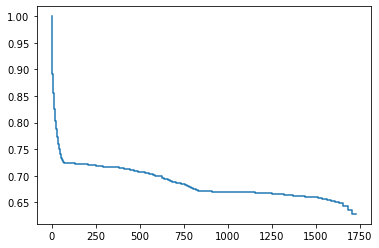

In [21]:
time,survival_prob = kaplan_meier_estimator(data_y['churn'],data_y['time'])
plt.step(time,survival_prob)

Text(0.5, 0, 'time $t$')

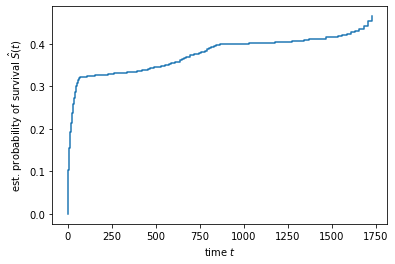

In [22]:
hazard = -np.log(survival_prob)
plt.step(time, hazard, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

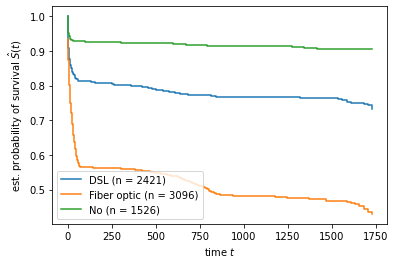

In [35]:
for value in data_x["internetservice"].unique():
    mask = data_x["internetservice"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["churn"][mask],
                                                           data_y["time"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

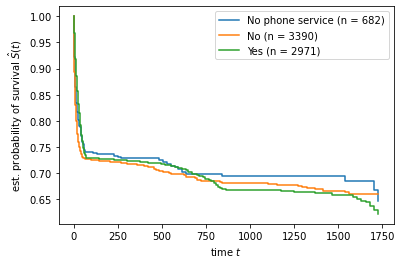

In [33]:
for value in data_x["multiplelines"].unique():
    mask = data_x["multiplelines"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["churn"][mask],
                                                           data_y["time"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))
    

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

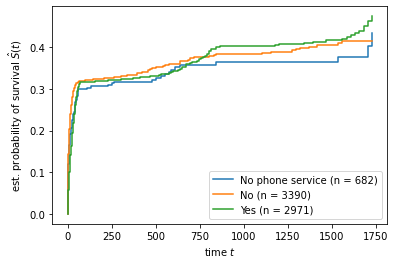

In [34]:
for value in data_x["multiplelines"].unique():
    mask = data_x["multiplelines"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["churn"][mask],
                                                           data_y["time"][mask])
    plt.step(time_cell, -np.log(survival_prob_cell), where="post",
             label="%s (n = %d)" % (value, mask.sum()))
    

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [12]:

#make all object types to numeric it is not standart as everyone has an opinion 

df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['gender'] = le.fit_transform(df['gender'])
df.replace('Yes', 1,inplace=True)
df.replace('No', 0,inplace=True)
df['multiplelines'].replace('No phone service', 0,inplace=True)
df.replace('No internet service', 0,inplace=True)

df['internetservice'].replace(1, 0,inplace=True)
df['internetservice'].replace('DSL', 1,inplace=True)
df['internetservice'].replace('Fiber optic', 2,inplace=True)
df['internetservice'].unique()

df['contract'].replace('Month-to-month', 1,inplace=True)
df['contract'].replace('One year', 12,inplace=True)
df['contract'].replace('Two year', 24,inplace=True)
df['contract'].unique()

df['paymentmethod'].replace('Electronic check', 0, inplace = True)
df['paymentmethod'].replace('Mailed check', 1, inplace = True)
df['paymentmethod'].replace('Bank transfer (automatic)', 2, inplace = True)
df['paymentmethod'].replace('Credit card (automatic)', 3, inplace = True)

df = pd.get_dummies(df, columns=['paymentmethod'])

In [13]:
datay = pd.DataFrame(data.churn)
datay['time'] = data.tenure*data.contract
datay['churn'] = datay['churn'].astype('bool')
datay = datay.to_numpy()
datax = data.drop(columns = ['churn','tenure','contract','monthlycharges','totalcharges'])

In [14]:
dt=dtype=[('Status', '?'), ('Survival_in_days', '<f8')]

In [15]:
datay=np.array([tuple(row) for row in datay], dtype=dt)

In [16]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(datax, datay)

CoxPHSurvivalAnalysis()

In [36]:
pd.Series(estimator.coef_, index=datax.columns)

gender             -0.047425
seniorcitizen       0.065635
partner            -0.560367
dependents         -0.202815
phoneservice       -0.619093
multiplelines      -0.427439
internetservice     1.252104
onlinesecurity     -0.781025
onlinebackup       -0.639475
deviceprotection   -0.501907
techsupport        -0.750546
streamingtv        -0.201152
streamingmovies    -0.228706
paperlessbilling    0.334541
paymentmethod      -0.343425
dtype: float64

In [18]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(datax)
result = concordance_index_censored(datay["Status"], datay["Survival_in_days"], prediction)
result[0]

0.8247554777927322